# Classification


##### Practical assingment for Supervised Learning : classifiction course on Coursera. 

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import label_binarize
%matplotlib inline

In [110]:
data = pd.read_csv('heart.csv')

In [111]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Attribute Information


1. Age
2. Sex
3. Chest pain type (4 values)
4. Resting blood pressure
5. Serum cholestoral in mg/dl
6. Fasting blood sugar > 120 mg/dl
7. Resting electrocardiographic results (values 0,1,2)
8. Maximum heart rate achieved
9. Exercise induced angina
10. Oldpeak = ST depression induced by exercise relative to rest
11. The slope of the peak exercise ST segment
12. Number of major vessels (0-3) colored by flourosopy
13. Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

**Checking missing values**

In [112]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

[Text(22.5, 0.5, 'Data Points'),
 Text(0.5, 4.421875, 'Columns'),
 Text(0.5, 1, 'Missing Data')]

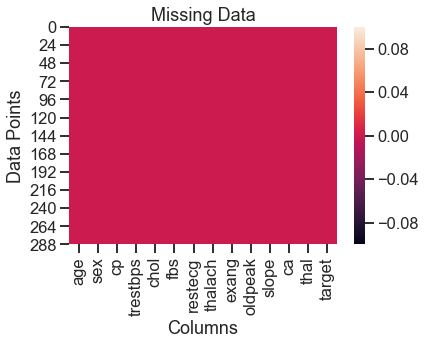

In [113]:
sns.heatmap(data.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

***There is no missing values***

**Data Discrption**

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [115]:
round(data.describe(),2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [116]:
df_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2


In [117]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['sex', 'fbs', 'exang', 'target']

In [118]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['cp', 'restecg', 'slope', 'ca', 'thal']

In [119]:
[[i, list(data[i].unique())] for i in categorical_variables]

[['cp', [3, 2, 1, 0]],
 ['restecg', [0, 1, 2]],
 ['slope', [0, 2, 1]],
 ['ca', [0, 2, 1, 3, 4]],
 ['thal', [1, 2, 3, 0]]]

In [120]:
numeric_variables = list(set(data.columns) - set(categorical_variables) - set(binary_variables))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE12F44908>,
      dtype=object)

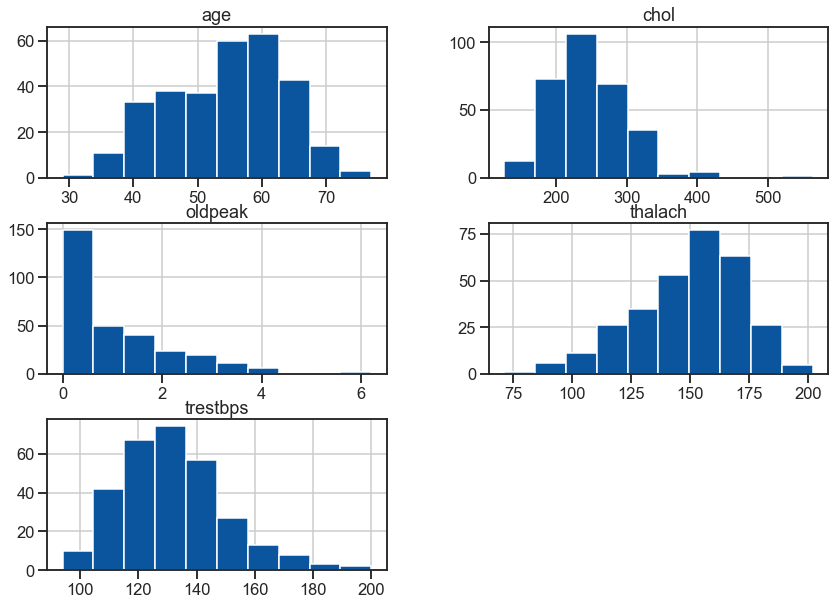

In [121]:
data[numeric_variables].hist(  figsize=(14, 10))

*Here some basic statistics of data* 

In [122]:
y = (data['target']).astype(int)
fields = list(data.columns[:-1])  # everything except "target"
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
dtype: float64

[(-1, 1), Text(0, 0.5, 'pearson correlation')]

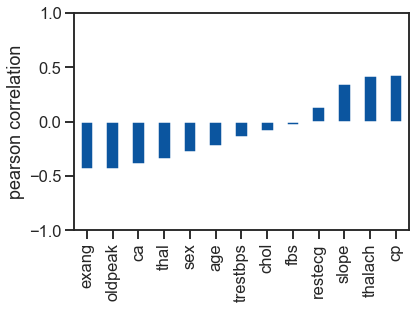

In [123]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation')

*Above the some feature have high correlation with each other*

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


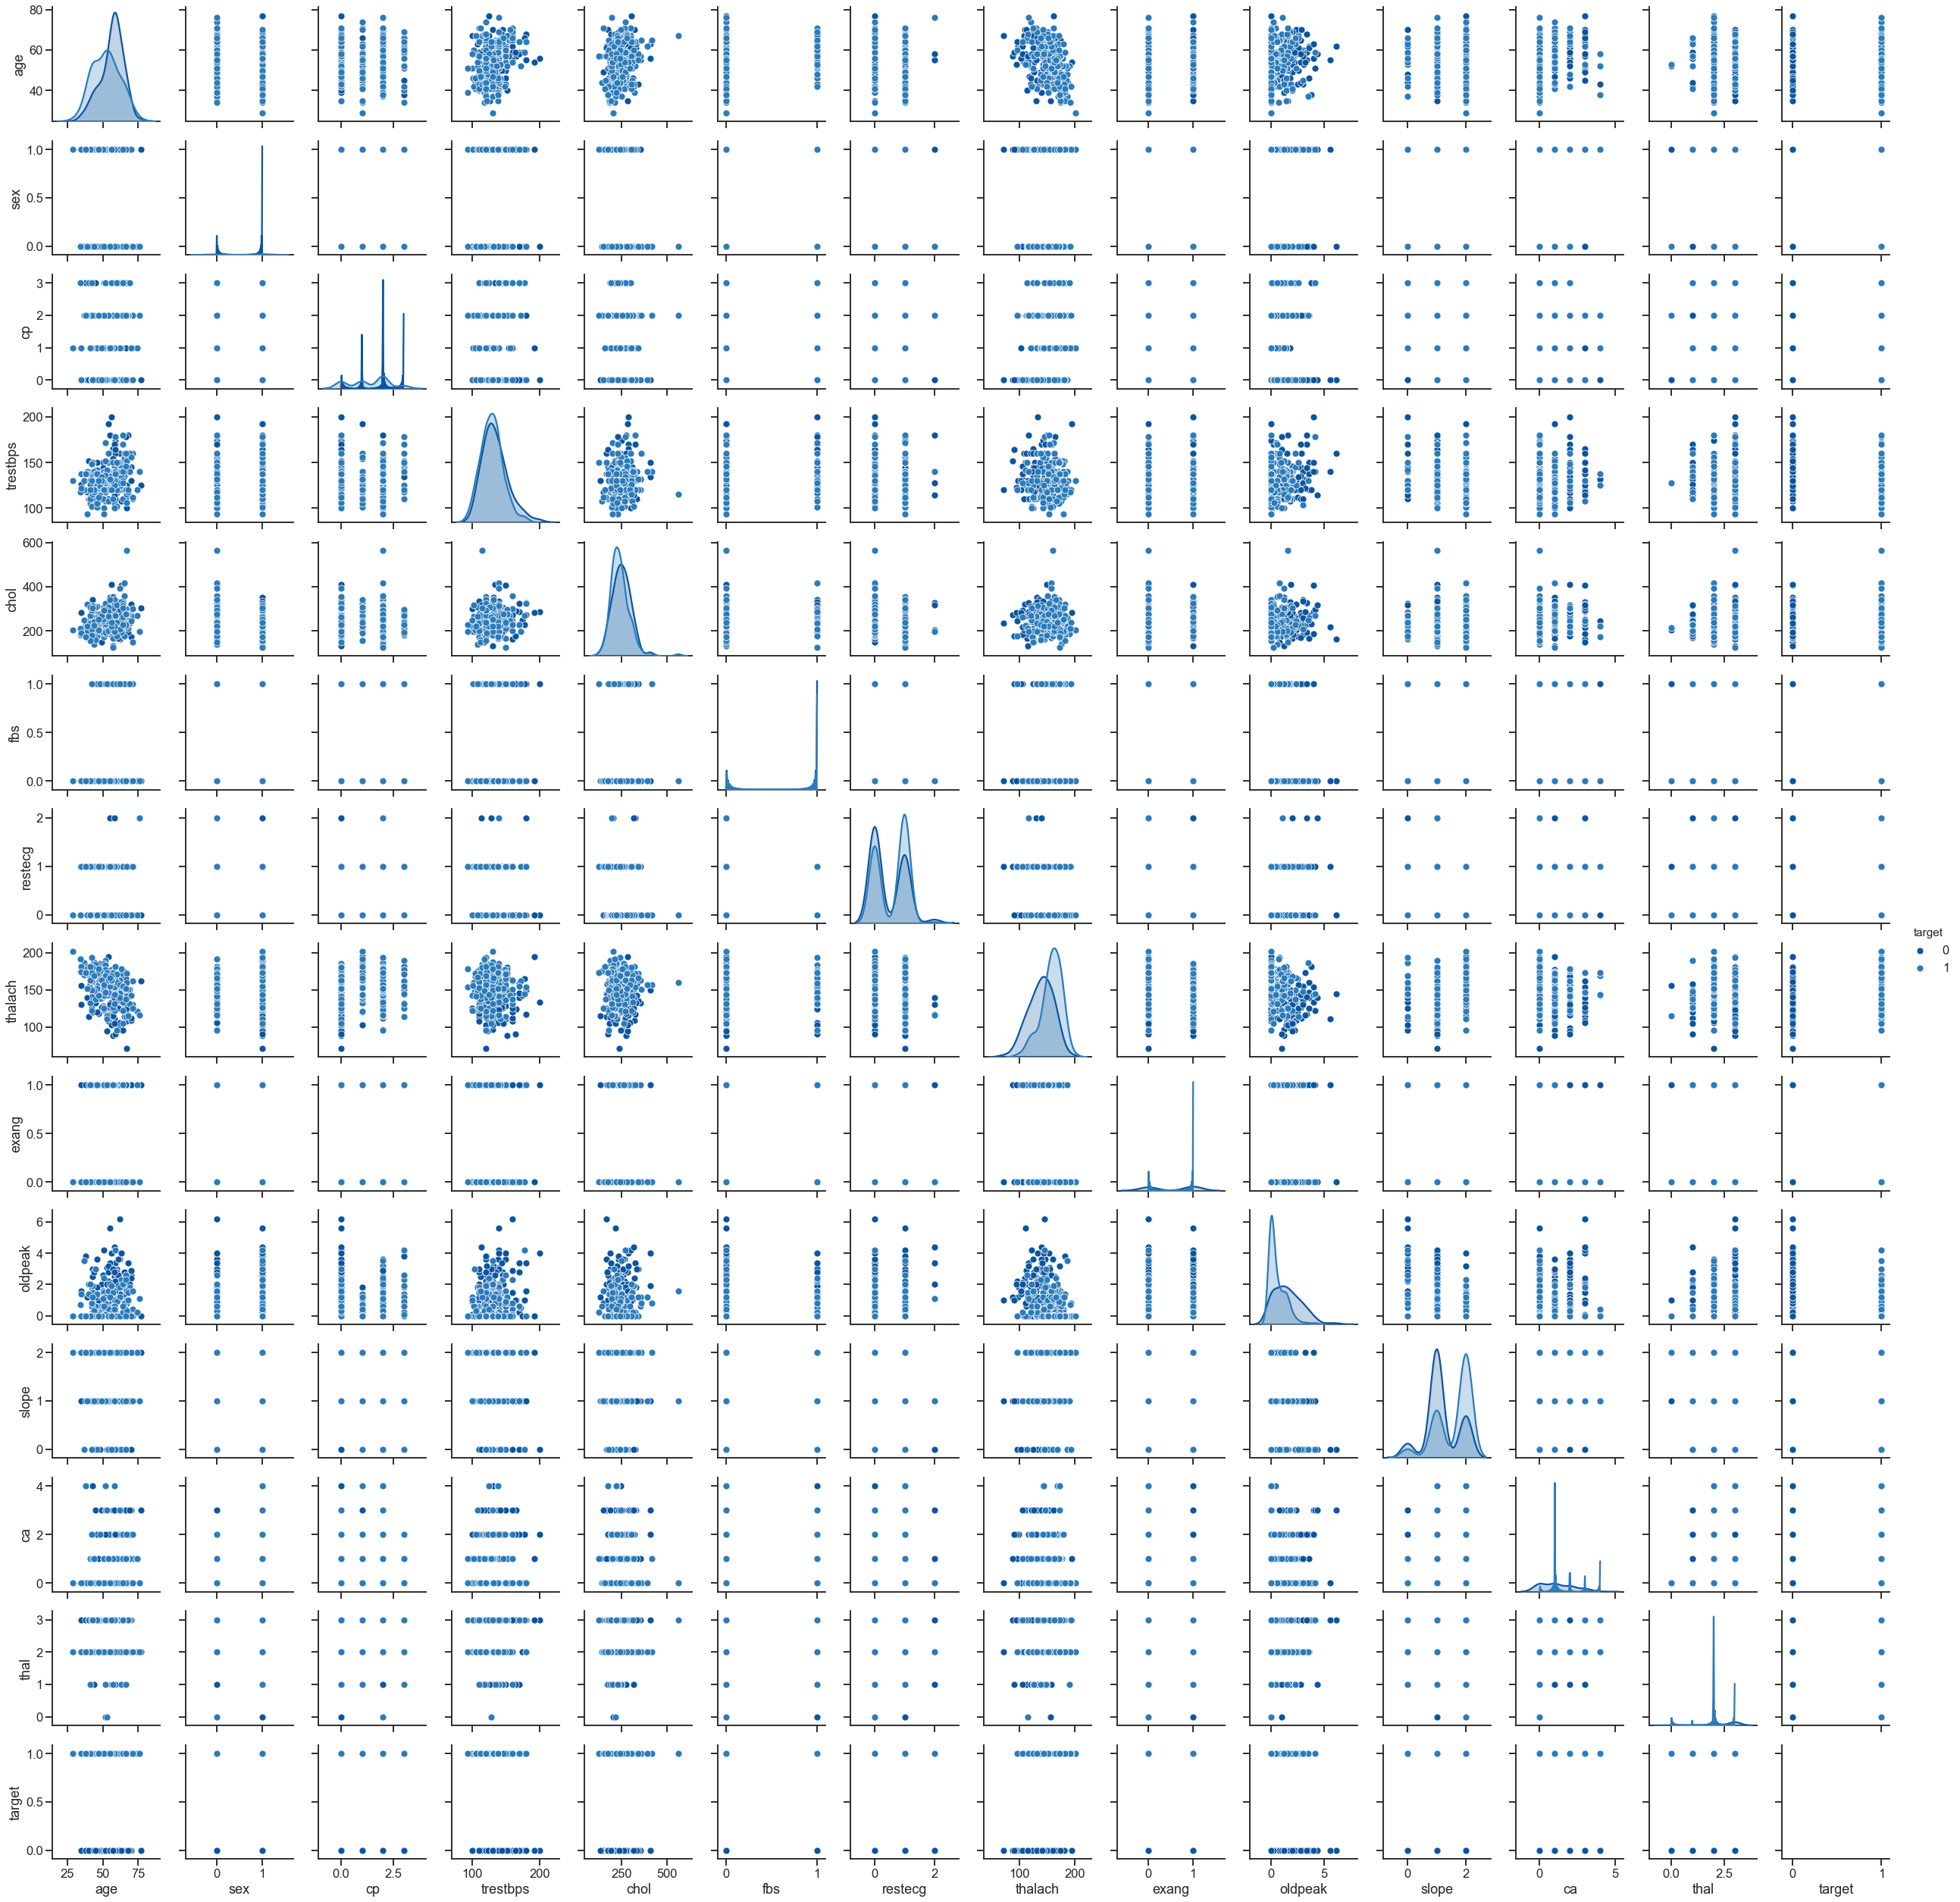

In [124]:
sns.pairplot(data, hue='target')

**Target Analysis**

In [125]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Target attribute is well balance so can use ***ROC*** 

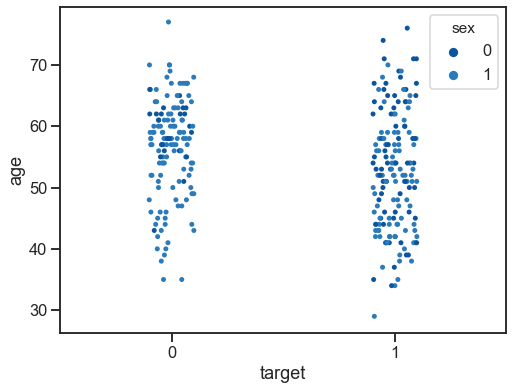

In [126]:
fig = plt.figure(figsize=(8, 6))
sns.stripplot(x = 'target', y ='age',data= data, hue = 'sex')

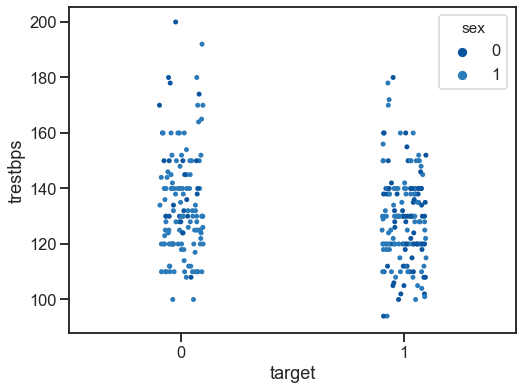

In [127]:
fig = plt.figure(figsize=(8, 6))
sns.stripplot(x = 'target', y ='trestbps',data= data, hue = 'sex')

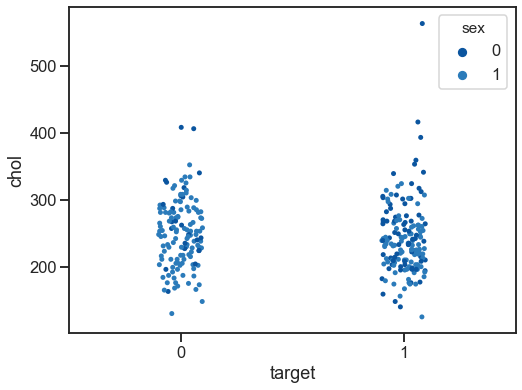

In [128]:
fig = plt.figure(figsize=(8, 6))
sns.stripplot(x = 'target', y ='chol',data= data, hue = 'sex')

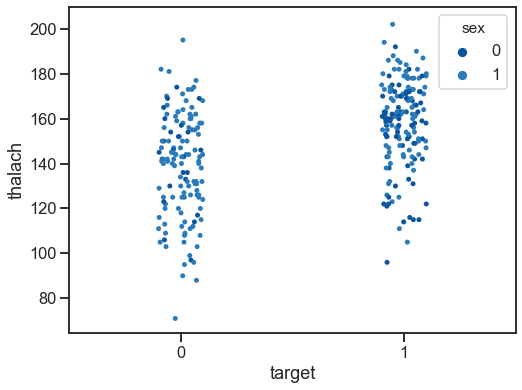

In [129]:
fig = plt.figure(figsize=(8, 6))
sns.stripplot(x = 'target', y ='thalach',data= data, hue = 'sex')

## Data spliting for Logistic Regression

In [130]:
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.target))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'target']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'target']

In [131]:
y_train.value_counts(normalize=True)

1    0.542453
0    0.457547
Name: target, dtype: float64

In [132]:
y_test.value_counts(normalize=True)

1    0.549451
0    0.450549
Name: target, dtype: float64

In [133]:
lr = LogisticRegression(solver='liblinear')
lr_l1 = LogisticRegressionCV(penalty='l1', solver='liblinear')
lr_l2 = LogisticRegressionCV(penalty='l2', solver='liblinear')

In [134]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
lr_l1.fit(X_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l1', random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [136]:
lr_l2.fit(X_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [137]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

In [138]:
y_pred.head()

,lr,l1,l2
0,1,1,1
1,1,1,1
2,0,0,0
3,0,0,0
4,1,1,1


In [139]:
y_prob.head()

,lr,l1,l2
0,0.987076,0.991322,0.992806
1,0.708122,0.701662,0.696676
2,0.962319,0.971350,0.977209
3,0.918557,0.938187,0.941391
4,0.626855,0.639951,0.633908


In [140]:
def measure_error(y_test, y_pred, label):
    return pd.Series({'accuracy':round(accuracy_score(y_test, y_pred),2),
                      'precision': round(precision_score(y_test, y_pred),2),
                      'recall': round(recall_score(y_test, y_pred),2),
                      'f1': round(f1_score(y_test, y_pred),2)},
                      name=label)

In [141]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

error_lr = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

error_lr

,train,test
accuracy,0.87,0.75
precision,0.85,0.75
recall,0.92,0.80
f1,0.89,0.78


In [142]:
y_train_pred = lr_l1.predict(X_train)
y_test_pred = lr_l1.predict(X_test)

error_lr_l1 = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

error_lr_l1

,train,test
accuracy,0.87,0.75
precision,0.85,0.75
recall,0.92,0.80
f1,0.88,0.78


In [143]:
y_train_pred = lr_l2.predict(X_train)
y_test_pred = lr_l2.predict(X_test)

error_lr_l2 = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

error_lr_l2

,train,test
accuracy,0.87,0.76
precision,0.85,0.76
recall,0.92,0.82
f1,0.89,0.79


## KNN

In [144]:
max_k = 50
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

Text(0.5, 1.0, 'KNN F1 Score')

<Figure size 1800x1200 with 0 Axes>

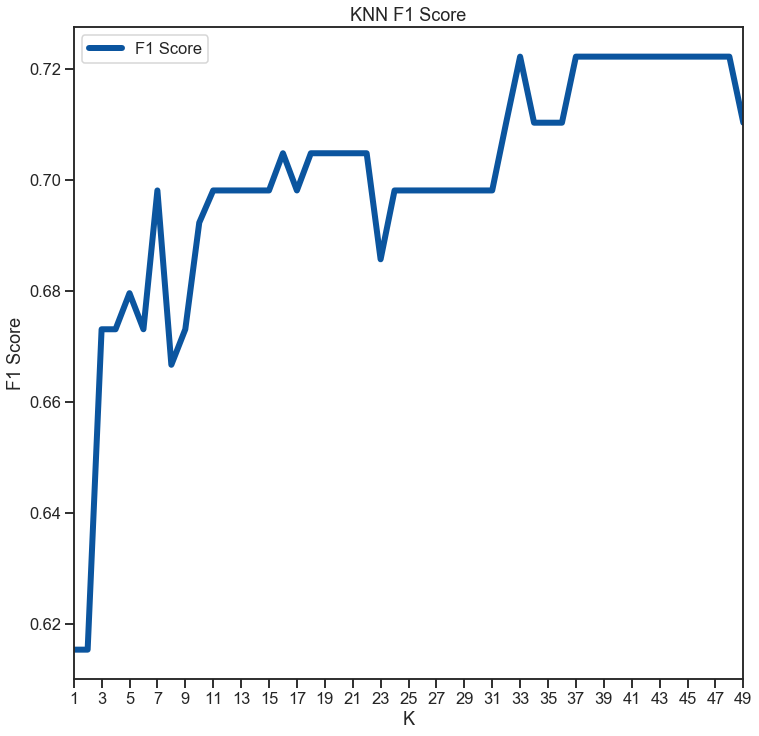

In [145]:
sns.set_context('talk')
sns.set_style('ticks')
plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')

Text(0.5, 1.0, 'KNN Elbow Curve')

<Figure size 1800x1200 with 0 Axes>

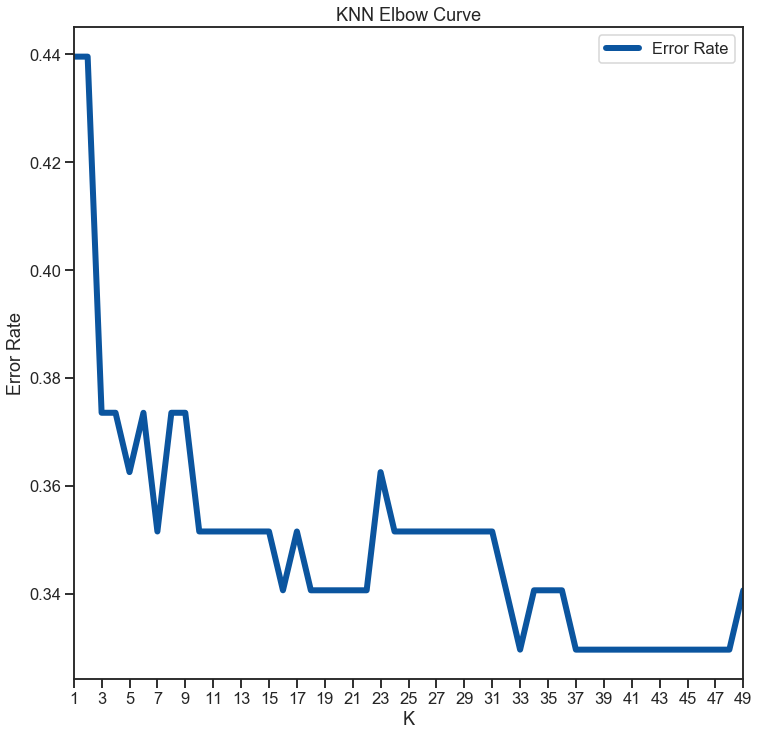

In [146]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')

In [147]:
knn = KNeighborsClassifier(n_neighbors=17)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.64      0.56      0.60        41
           1       0.67      0.74      0.70        50

    accuracy                           0.66        91
   macro avg       0.66      0.65      0.65        91
weighted avg       0.66      0.66      0.66        91

Accuracy score:  0.66
F1 Score:  0.7


In [149]:
confusion_matrix(y_test, y_pred)

array([[23, 18],
       [13, 37]], dtype=int64)